# Introduction

Write a beautiful introduction!

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, GRU, Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import nltk
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline, BartForConditionalGeneration, BartTokenizer, GPT2LMHeadModel, GPT2Tokenizer
import torch
import gc
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

!pip install datasets
from datasets import Dataset

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

torch.cuda.is_available()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Loading Data & Category Mapping

In [2]:
# #Loading our dataset
# drive.mount('/content/drive')

# # Load the dataset
# df = pd.read_csv('/content/drive/MyDrive/Project1/Consumer Reviews of Amazon Products/1429_1.csv', usecols =[ 'id', 'categories', 'reviews.date', 'reviews.rating', 'reviews.text', 'reviews.title'])
original = pd.read_csv('/content/1429_1.csv',low_memory=False)

In [3]:
original.head()

id                                               name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

        asins   brand                                         categories  \
0  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                                keys manufacturer  \
0  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
1  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
2  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
3  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
4  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   

               reviews.date     reviews.dateAdded  \
0  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
1  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
2  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
3  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
4  2017-01-12T00:00:00.000Z  2017-07-03T23:33:15Z   

                                    reviews.dateSeen  ... reviews.doRecommend  \
0  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...                True   
1  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...                True   
2  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...                True   
3  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...                True   
4  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...                True   

  reviews.id  reviews.numHelpful  reviews.rating  \
0        NaN                 0.0             5.0   
1        NaN                 0.0             5.0   
2        NaN                 0.0             5.0   
3        NaN                 0.0             4.0   
4        NaN                 0.0             5.0   

                                  reviews.sourceURLs  \
0  http://reviews.bestbuy.com/3545/5620406/review...   
1  http://reviews.bestbuy.com/3545/5620406/review...   
2  http://reviews.bestbuy.com/3545/5620406/review...   
3  http://reviews.bestbuy.com/3545/5620406/review...   
4  http://reviews.bestbuy.com/3545/5620406/review...   

                                        reviews.text  \
0  This product so far has not disappointed. My c...   
1  great for beginner or experienced person. Boug...   
2  Inexpensive tablet for him to use and learn on...   
3  I've had my Fire HD 8 two weeks now and I love...   
4  I bought this for my grand daughter when she c...   

                             reviews.title reviews.userCity  \
0                                   Kindle              NaN   
1                                very fast              NaN   
2  Beginner tablet for our 9 year old son.              NaN   
3                                  Good!!!              NaN   
4                Fantastic Tablet for kids              NaN   

   reviews.userProvince  reviews.username  
0                   NaN           Adapter  
1                   NaN            truman  
2                   NaN             DaveZ  
3                   NaN            Shacks  
4                   NaN         explore42  

[5 rows x 21 columns]

In [4]:
df = original[['id', 'name', 'categories', 'reviews.date', 'reviews.rating', 'reviews.text', 'reviews.title']].copy()
df = df.dropna(subset=['reviews.rating', 'reviews.text', 'reviews.date'])   # dropping rows with no review text or rating
df['reviews.title'] = df['reviews.title'].fillna(" ")
df['name'] = df['name'].fillna("NA")    # replace missing product names with "NA" > used in mapping below

In [5]:
## Defining the mapping dicts

name_categories = {
    'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta': 'Tablets',
    'Kindle Oasis E-reader with Leather Charging Cover - Merlot, 6 High-Resolution Display (300 ppi), Wi-Fi - Includes Special Offers,,': 'E-readers',
    'Amazon Kindle Lighted Leather Cover,,,\r\nAmazon Kindle Lighted Leather Cover,,,': 'Accessories',
    'Amazon Kindle Lighted Leather Cover,,,\r\nKindle Keyboard,,,': 'Accessories',
    'Kindle Keyboard,,,\r\nKindle Keyboard,,,': 'Accessories',
    'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta': 'Tablets',
    'Fire HD 8 Tablet with Alexa, 8 HD Display, 32 GB, Tangerine - with Special Offers,': 'Tablets',
    'Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,\r\nAmazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,': 'Accessories',
    'All-New Kindle E-reader - Black, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers,,': 'E-readers',
    'Amazon Kindle Fire Hd (3rd Generation) 8gb,,,\r\nAmazon Kindle Fire Hd (3rd Generation) 8gb,,,': 'E-readers',
    'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta': 'Tablets',
    'Kindle Oasis E-reader with Leather Charging Cover - Black, 6 High-Resolution Display (300 ppi), Wi-Fi - Includes Special Offers,,': 'E-readers',
    'Amazon - Kindle Voyage - 4GB - Wi-Fi + 3G - Black,,,\r\nAmazon - Kindle Voyage - 4GB - Wi-Fi + 3G - Black,,,': 'E-readers',
    'Amazon - Kindle Voyage - 4GB - Wi-Fi + 3G - Black,,,\r\nFire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers",': 'E-readers',
    'Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers,': 'Tablets',
    'Amazon Standing Protective Case for Fire HD 6 (4th Generation) - Black,,,\r\nAmazon Standing Protective Case for Fire HD 6 (4th Generation) - Black,,,': 'Accessories',
    'Certified Refurbished Amazon Fire TV (Previous Generation - 1st),,,\r\nCertified Refurbished Amazon Fire TV (Previous Generation - 1st),,,': 'Streaming Devices & Smart Speakers',
    'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,': 'E-readers',
    'Amazon Kindle Touch Leather Case (4th Generation - 2011 Release), Olive Green,,,\r\nAmazon Kindle Touch Leather Case (4th Generation - 2011 Release), Olive Green,,,': 'Accessories',
    'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case': 'Tablets',
    'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,': 'E-readers',
    'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,': 'E-readers',
    'Certified Refurbished Amazon Fire TV Stick (Previous Generation - 1st),,,\r\nCertified Refurbished Amazon Fire TV Stick (Previous Generation - 1st),,,': 'Streaming Devices & Smart Speakers',
    'Certified Refurbished Amazon Fire TV Stick (Previous Generation - 1st),,,\r\nKindle Paperwhite,,,': 'Streaming Devices & Smart Speakers',
    'Kindle Paperwhite,,,\r\nKindle Paperwhite,,,': 'E-readers',
    'Amazon Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case - Blue': 'Tablets',
    'Kindle Paperwhite E-reader - White, 6 High-Resolution Display (300 ppi) with Built-in Light, Wi-Fi - Includes Special Offers,,': 'E-readers',
    'Amazon Echo and Fire TV Power Adapter,,,\r\nAmazon Echo and Fire TV Power Adapter,,,': 'Accessories',
    'Amazon Fire Hd 8 8in Tablet 16gb Black B018szt3bk 6th Gen (2016) Android,,,\r\nAmazon Fire Hd 8 8in Tablet 16gb Black B018szt3bk 6th Gen (2016) Android,,,': 'Tablets',
    'Certified Refurbished Amazon Fire TV with Alexa Voice Remote,,,\r\nCertified Refurbished Amazon Fire TV with Alexa Voice Remote,,,': 'Streaming Devices & Smart Speakers',
    'Amazon - Fire 16GB (5th Gen, 2015 Release) - Black,,,\r\nAmazon - Fire 16GB (5th Gen, 2015 Release) - Black,,,': 'Tablets',
    'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Black': 'Tablets',
    'Echo (White),,,\r\nEcho (White),,,': 'Streaming Devices & Smart Speakers',
    'Echo (White),,,\r\nFire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Tangerine"': 'Streaming Devices & Smart Speakers',
    'Echo (Black),,,\r\nEcho (Black),,,': 'Streaming Devices & Smart Speakers',
    'Echo (Black),,,\r\nAmazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,': 'Accessories',
    'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,\r\nAmazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,': 'Accessories',
    'Amazon Fire Hd 6 Standing Protective Case(4th Generation - 2014 Release), Cayenne Red,,,\r\nAmazon Fire Hd 6 Standing Protective Case(4th Generation - 2014 Release), Cayenne Red,,,': 'Accessories',
    'Amazon Fire Hd 6 Standing Protective Case(4th Generation - 2014 Release), Cayenne Red,,,\r\nAmazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,': 'Accessories',
    'Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,\r\nAmazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,': 'Tablets',
    'Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,\r\nAmazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,': 'Streaming Devices & Smart Speakers',
    'Coconut Water Red Tea 16.5 Oz (pack of 12),,,\r\nAmazon Fire Tv,,,': 'Streaming Devices & Smart Speakers',
    'Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,': 'Streaming Devices & Smart Speakers',
    'Amazon Fire Tv,,,\r\nKindle Dx Leather Cover, Black (fits 9.7 Display, Latest and 2nd Generation Kindle Dxs)",,': 'Accessories',
    'Kindle Dx Leather Cover, Black (fits 9.7 Display, Latest and 2nd Generation Kindle Dxs),,': 'Accessories',
    'Amazon Kindle Fire 5ft USB to Micro-USB Cable (works with most Micro-USB Tablets),,,\r\nAmazon Kindle Fire 5ft USB to Micro-USB Cable (works with most Micro-USB Tablets),,,': 'Accessories',
    'New Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable,,,\r\nNew Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable,,,': 'Accessories',
    'New Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable,,,\r\n': 'Accessories',
    'NA': 'Uncategorized'   # for products with no names
}



na_categories = {
    'Stereos,Remote Controls,Amazon Echo,Audio Docks & Mini Speakers,Amazon Echo Accessories,Kitchen & Dining Features,Speaker Systems,Electronics,TVs Entertainment,Clearance,Smart Hubs & Wireless Routers,Featured Brands,Wireless Speakers,Smart Home & Connected Living,Home Security,Kindle Store,Home Automation,Home, Garage & Office,Home,Voice-Enabled Smart Assistants,Virtual Assistant Speakers,Portable Audio & Headphones,Electronics Features,Amazon Device Accessories,iPod, Audio Player Accessories,Home & Furniture Clearance,Consumer Electronics,Smart Home,Surveillance,Home Improvement,Smart Home & Home Automation Devices,Smart Hubs,Home Safety & Security,Voice Assistants,Alarms & Sensors,Amazon Devices,Audio,Holiday Shop': 'Streaming Devices & Smart Speakers',
    'Fire Tablets,Tablets,Computers & Tablets,All Tablets,Frys': 'Tablets',
    'TVs Entertainment,Wireless Speakers,Virtual Assistant Speakers,Featured Brands,Electronics,Amazon Devices,Home,Home Improvement,Home Safety & Security,Home Security,Alarms & Sensors,Smart Home & Home Automation Devices,Smart Hubs & Wireless Routers,Smart Hubs,Consumer Electronics,Voice-Enabled Smart Assistants,Smart Home & Connected Living,Home, Garage & Office,Smart Home,Voice Assistants,Surveillance,Home Automation,Speakers,Electronics Features,Holiday Shop,TV, Video & Home Audio,Internet & Media Streamers,Amazon Echo,Hubs & Controllers': 'Streaming Devices & Smart Speakers',
    'Chargers & Adapters,Computers & Accessories,Tablet & E-Reader Accessories,Amazon Devices & Accessories,Fire Tablet Accessories,Electronics,Power Adapters & Cables,Cell Phones,Amazon Device Accessories,Cell Phone Accessories,Cell Phone Batteries & Power,Tablet Accessories,Featured Brands,Kindle Fire (2nd Generation) Accessories,Kindle Store,Home Improvement,Fire (5th Generation) Accessories,Electrical,Amazon Devices,Home,Tablets & E-Readers,Cables & Chargers': 'Accessories',
    'Cases,Kindle Store,Amazon Device Accessories,Accessories,Tablet Accessories': 'Accessories',
    'Electronics,eBook Readers & Accessories,Power Adapters,Computers/Tablets & Networking,Tablet & eBook Reader Accs,Chargers & Sync Cables,Power Adapters & Cables,Kindle Store,Amazon Device Accessories,Kindle Fire (2nd Generation) Accessories,Fire Tablet Accessories': 'Accessories',
    'Electronics,Tablets & E-Readers,Tablets,Back To College,College Electronics,College Ipads & Tablets,Featured Brands,Amazon Devices,Electronics Deals,Computers & Tablets,All Tablets,Electronics Features,eBook Readers': 'Tablets',
    'Featured Brands,Electronics,Amazon Devices,Home,Home Improvement,Home Safety & Security,Home Security,Alarms & Sensors,Smart Home & Home Automation Devices,Mobile,Mobile Speakers,Mobile Bluetooth Speakers,Smart Hubs & Wireless Routers,Smart Hubs,Home, Garage & Office,Smart Home,Voice Assistants,Smart Home & Connected Living,Amazon Tap,Portable Audio,MP3 Accessories,Speakers,Amazon Echo,Electronics Features,TVs & Electronics,Portable Audio & Electronics,MP3 Player Accessories,Home Theater & Audio,Kindle Store,Frys,Electronic Components,Home Automation,Electronics, Tech Toys, Movies, Music,Audio,Bluetooth Speakers': 'Streaming Devices & Smart Speakers',
    'Rice Dishes,Ready Meals,Beauty,Moisturizers,Lotions': 'Food & Beverages',
    'Back To College,College Electronics,College Tvs & Home Theater,Electronics,Tvs & Home Theater,Streaming Devices,Featured Brands,Amazon Devices,Holiday Shop,Ways To Shop,TV & Home Theater,Streaming Media Players,All Streaming Media Players,TVs Entertainment,Video Games,Kindle Store,Electronics Features,Kids & Family,Fire TV': 'Streaming Devices & Smart Speakers',
    'Electronics,Amazon Device Accessories,Kindle Store,Covers,Kindle E-Reader Accessories,Kindle DX (2nd Generation, Global Wireless) Accessories': 'Accessories',
    'Power Adapters & Cables,Electronics,USB Cables': 'Accessories',
    'Computers/Tablets & Networking,Tablet & eBook Reader Accs,Chargers & Sync Cables,Power Adapters & Cables,Kindle Store,Amazon Device Accessories,Fire Tablet Accessories,Kindle Fire (2nd Generation) Accessories': 'Accessories',
    'Amazon Devices & Accessories,Amazon Device Accessories,Power Adapters & Cables,Kindle Store,Kindle E-Reader Accessories,Kindle Paperwhite Accessories': 'Accessories'
}


In [6]:
## Mapping
df['primaryCategories'] = df['name'].map(name_categories).fillna('Uncategorized')   # 1st mapping: setting primary category based on product name else; Uncategorized
uncategorized_mask = df['primaryCategories'] == 'Uncategorized'   # defining mask for second mapping
df.loc[uncategorized_mask, 'primaryCategories'] = df.loc[uncategorized_mask, 'categories'].map(na_categories) # 2nd mapping: setting primary category for the Uncategorized based on categories

In [7]:
df = df[df['primaryCategories'] != 'Food & Beverages'] # dropping this single review on a drink
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34597 entries, 0 to 34659
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 34597 non-null  object 
 1   name               34597 non-null  object 
 2   categories         34597 non-null  object 
 3   reviews.date       34597 non-null  object 
 4   reviews.rating     34597 non-null  float64
 5   reviews.text       34597 non-null  object 
 6   reviews.title      34597 non-null  object 
 7   primaryCategories  34597 non-null  object 
dtypes: float64(1), object(7)
memory usage: 2.4+ MB


# Traditional NLP & ML approaches

## 1. Data Preprocessing

### 1.2 Data Cleaning
Removed special characters, punctuation, and unnecessary whitespace from the text data.
Converted text to lowercase to ensure consistency in word representations.

In [8]:
# Initializing the texts and labels

texts = df['reviews.text'].tolist()
labels = df['reviews.rating'].tolist()

# Check lengths after cleaning
print(len(texts))
print(len(labels))

34597
34597


In [9]:
# split the dataset into train, validation and test sets (60-20-20)
training_texts, test_texts, training_labels, test_labels = train_test_split(texts, labels, test_size=.4, random_state=42, stratify=labels)

validation_texts, test_texts, validation_labels, test_labels = train_test_split(test_texts, test_labels, test_size=.5, random_state=42, stratify=test_labels)

# print the sizes of each set
print(f'Training set size: {len(training_texts)} and {len(training_labels)}')
print(f'Validation set size: {len(validation_texts)}')
print(f'Test set size: {len(test_texts)}')

Training set size: 20758 and 20758
Validation set size: 6919
Test set size: 6920


In [10]:
# Function to map ratings to three categories
def map_ratings_to_labels(rating):
    if rating in [1, 2]:
        return 0  # Negative
    elif rating == 3:
        return 1  # Neutral
    else:
        return 2  # Positive

# Map training, validation, and test labels to categories
mapped_training_labels = [map_ratings_to_labels(rating) for rating in training_labels]
mapped_validation_labels = [map_ratings_to_labels(rating) for rating in validation_labels]
mapped_test_labels = [map_ratings_to_labels(rating) for rating in test_labels]

# Count occurrences in each mapped labels set
training_label_counts = Counter(mapped_training_labels)
validation_label_counts = Counter(mapped_validation_labels)
test_label_counts = Counter(mapped_test_labels)

# Display the counts
print("Training label counts:", training_label_counts)
print("Validation label counts:", validation_label_counts)
print("Test label counts:", test_label_counts)

Training label counts: Counter({2: 19372, 1: 899, 0: 487})
Validation label counts: Counter({2: 6457, 1: 300, 0: 162})
Test label counts: Counter({2: 6457, 1: 300, 0: 163})


In [11]:
def clean_text(text):
    # Handle non-string types
    if not isinstance(text, str):
        return ""  # Or handle it differently based on your needs

    # Remove special characters and punctuation
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    # Remove unnecessary whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Convert text to lowercase
    text = text.lower()
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text


### 1.3 Tokenization and Lemmatization
Tokenized the text data to break it into individual words or tokens.
Applied lemmatization to reduce words to their base or root form for better feature representation.

In [12]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)


In [13]:
def preprocess_text(text):
    cleaned_text = clean_text(text)
    lemmatized_text = lemmatize_text(cleaned_text)
    return lemmatized_text

In [14]:
# Apply preprocessing to training, validation, and test sets
preprocessed_training_texts = [preprocess_text(text) for text in training_texts]
preprocessed_validation_texts = [preprocess_text(text) for text in validation_texts]
preprocessed_test_texts = [preprocess_text(text) for text in test_texts]

### 1.4 Vectorization
Used techniques such as CountVectorizer or TF-IDF Vectorizer to convert text data into numerical vectors.
Created a document-term matrix representing the frequency of words in the corpus.

In [15]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit-transform on training data
vectorized_training_texts = tfidf_vectorizer.fit_transform(preprocessed_training_texts)

# Transform validation and test data using the fitted vectorizer
vectorized_validation_texts = tfidf_vectorizer.transform(preprocessed_validation_texts)
vectorized_test_texts = tfidf_vectorizer.transform(preprocessed_test_texts)


## 2. Model Building
### 2.1 Model Selection
Explored different machine learning algorithms for text classification, including:
Naive Bayes
Logistic Regression
Support Vector Machines
Random Forest
Evaluated each algorithm's performance using cross-validation and grid search for hyperparameter tuning.


**Naive Bayes**

In [ ]:
# Pipeline for Naive Bayes
pipeline_nb = Pipeline([
    ('nb', MultinomialNB())
])

# Cross-validation
cv_scores = cross_val_score(pipeline_nb, vectorized_validation_texts, validation_labels, cv=5)
print(f"Naive Bayes Cross-validation Scores: {cv_scores}")

# Hyperparameter tuning with GridSearchCV
param_grid = {'nb__alpha': [0.1, 0.5, 1.0]}
grid_search = GridSearchCV(pipeline_nb, param_grid, cv=5)
grid_search.fit(vectorized_validation_texts, validation_labels)
print(f"Best Params: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_}")

Naive Bayes Cross-validation Scores: [0.68641618 0.68713873 0.68569364 0.68641618 0.68691251]
Best Params: {'nb__alpha': 0.1}
Best CV Score: 0.6925855453713341


In [ ]:
# Fit the SVM pipeline on vectorized training data
pipeline_nb.fit(vectorized_training_texts, training_labels)

# Predict on validation data
y_pred = pipeline_nb.predict(vectorized_validation_texts)

# Generate classification report
classification_rep = classification_report(validation_labels, y_pred,zero_division=1)

# Print classification report
print("Classification Report for Support Vector Machine:")
print(classification_rep)

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

         1.0       1.00      0.00      0.00        82
         2.0       1.00      0.00      0.00        80
         3.0       1.00      0.00      0.00       300
         4.0       0.51      0.02      0.04      1706
         5.0       0.69      1.00      0.82      4751

    accuracy                           0.69      6919
   macro avg       0.84      0.20      0.17      6919
weighted avg       0.67      0.69      0.57      6919



**Logistic Regression**

In [ ]:
# Pipeline for Logistic Regression
pipeline_lr = Pipeline([
    ('lr', LogisticRegression(solver='liblinear', max_iter=200))  # set max_iter as 200 so the solver will execute to converge
])

# Cross-validation
cv_scores = cross_val_score(pipeline_lr, vectorized_validation_texts, validation_labels, cv=5)
print(f"Logistic Regression Cross-validation Scores: {cv_scores}")

# Hyperparameter tuning with GridSearchCV
param_grid = {'lr__C': [0.1, 1.0, 10.0]}
grid_search = GridSearchCV(pipeline_lr, param_grid, cv=5)
grid_search.fit(vectorized_validation_texts, validation_labels)
print(f"Best Params: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_}")

#Classification report

Logistic Regression Cross-validation Scores: [0.70231214 0.70014451 0.69508671 0.70520231 0.69486623]
Best Params: {'lr__C': 1.0}
Best CV Score: 0.6995223795134142


In [ ]:
# Fit the SVM pipeline on vectorized training data
pipeline_lr.fit(vectorized_training_texts, training_labels)

# Predict on validation data
y_pred = pipeline_lr.predict(vectorized_validation_texts)

# Generate classification report
classification_rep = classification_report(validation_labels, y_pred, zero_division=1)

# Print classification report
print("Classification Report for Support Vector Machine:")
print(classification_rep)

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

         1.0       1.00      0.01      0.02        82
         2.0       1.00      0.00      0.00        80
         3.0       0.37      0.04      0.08       300
         4.0       0.49      0.22      0.30      1706
         5.0       0.74      0.95      0.83      4751

    accuracy                           0.71      6919
   macro avg       0.72      0.24      0.25      6919
weighted avg       0.67      0.71      0.65      6919



**Support Vector Machines (SVM)**

In [ ]:
# # Pipeline for SVM
# pipeline_svm = Pipeline([
#     ('svm', SVC())
# ])

# # Cross-validation
# cv_scores = cross_val_score(pipeline_svm, vectorized_validation_texts, validation_labels, cv=5)
# print(f"SVM Cross-validation Scores: {cv_scores}")

# # Hyperparameter tuning with GridSearchCV
# param_grid = {
#     'svm__C': [0.1, 1, 10, 100],
#     'svm__gamma': [1, 0.1, 0.01, 0.001],
#     'svm__kernel': ['linear', 'rbf']
# }



# grid_search = GridSearchCV(pipeline_svm, param_grid, cv=5)
# grid_search.fit(vectorized_validation_texts, validation_labels)
# print(f"Best Params: {grid_search.best_params_}")
# print(f"Best CV Score: {grid_search.best_score_}")



SVM Cross-validation Scores: [0.69291908 0.69436416 0.69580925 0.69580925 0.70209689]


KeyboardInterrupt: 

In [ ]:

# # Fit the SVM pipeline on vectorized training data
# pipeline_svm.fit(vectorized_training_texts, training_labels)

# # Predict on validation data
# y_pred = pipeline_svm.predict(vectorized_validation_texts)

# # Generate classification report
# classification_rep = classification_report(validation_labels, y_pred, zero_division=1)

# # Print classification report
# print("Classification Report for Support Vector Machine:")
# print(classification_rep)

**Random Forest**

In [ ]:
# Pipeline for Random Forest
pipeline_rf = Pipeline([
    ('rf', RandomForestClassifier())
])

# Cross-validation
cv_scores = cross_val_score(pipeline_rf, vectorized_validation_texts, validation_labels, cv=5)
print(f"Random Forest Cross-validation Scores: {cv_scores}")

# Hyperparameter tuning with GridSearchCV
param_grid = {'rf__n_estimators': [50, 100, 200], 'rf__max_depth': [None, 10, 20]}
grid_search = GridSearchCV(pipeline_rf, param_grid, cv=5)
grid_search.fit(vectorized_validation_texts, validation_labels)
print(f"Best Params: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_}")


Random Forest Cross-validation Scores: [0.68063584 0.69580925 0.69291908 0.69291908 0.69631236]
Best Params: {'rf__max_depth': None, 'rf__n_estimators': 200}
Best CV Score: 0.6928748761802065


In [ ]:
# Fit the SVM pipeline on vectorized training data
pipeline_rf.fit(vectorized_training_texts, training_labels)

# Predict on validation data
y_pred = pipeline_rf.predict(vectorized_validation_texts)

# Generate classification report
classification_rep = classification_report(validation_labels, y_pred, zero_division=1)

# Print classification report
print("Classification Report for Support Vector Machine:")
print(classification_rep)

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        82
         2.0       1.00      0.03      0.05        80
         3.0       0.46      0.02      0.04       300
         4.0       0.52      0.11      0.18      1706
         5.0       0.71      0.98      0.83      4751

    accuracy                           0.70      6919
   macro avg       0.54      0.23      0.22      6919
weighted avg       0.65      0.70      0.61      6919



### 2.2 Model Training
Selected the best-performing algorithm based on evaluation metrics such as accuracy, precision, recall, and F1-score.
Trained the selected model on the preprocessed text data.


**Evaluating the models performances for selection**

In [ ]:
# Initialize dictionary with pipelines
pipelines = {
    'Naive Bayes': pipeline_nb,
    'Logistic Regression': pipeline_lr,
    'Support Vector Machine': pipeline_svm,
    'Random Forest': pipeline_rf
}

# List of pipeline names
pipeline_names = ['Naive Bayes', 'Logistic Regression', 'Support Vector Machine', 'Random Forest']

# Evaluate each pipeline
results = {}
for name in pipeline_names:
    pipeline = pipelines[name]

    # Fit the pipeline on vectorized training data
    pipeline.fit(vectorized_training_texts, training_labels)

    # Predict on validation data
    y_pred = pipeline.predict(vectorized_validation_texts)

    # Calculate metrics
    accuracy = accuracy_score(validation_labels, y_pred)
    precision = precision_score(validation_labels, y_pred, average='weighted', zero_division=1)
    recall = recall_score(validation_labels, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(validation_labels, y_pred, average='weighted', zero_division=1)

    # Store results
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    # Print results for each model
    print(f"{name}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1 Score: {f1}")
    print()


Naive Bayes:
  Accuracy: 0.6917184564243388
  Precision: 0.6696377563433862
  Recall: 0.6917184564243388
  F1 Score: 0.5730789805209636

Logistic Regression:
  Accuracy: 0.7097846509611215
  Precision: 0.667712527505165
  Recall: 0.7097846509611215
  F1 Score: 0.6490971412896401

Support Vector Machine:
  Accuracy: 0.7133978898684781
  Precision: 0.6839002547752838
  Recall: 0.7133978898684781
  F1 Score: 0.6380273350380722

Random Forest:
  Accuracy: 0.7025581731464084
  Precision: 0.6581017443125518
  Recall: 0.7025581731464084
  F1 Score: 0.6118664565564466



## 3. Model Evaluation
### 3.1 Evaluation Metrics
Evaluated the model's performance on a separate test dataset using various evaluation metrics:
Accuracy: Percentage of correctly classified instances.
Precision: Proportion of true positive predictions among all positive predictions.
Recall: Proportion of true positive predictions among all actual positive instances.
F1-score: Harmonic mean of precision and recall.
Calculated confusion matrix to analyze model's performance across different classes.



Logistic Regression Metrics on Validation Data:
  Accuracy: 0.8011273305390952
  Precision: 0.923566198478861
  Recall: 0.8011273305390952
  F1 Score: 0.8503777359539327


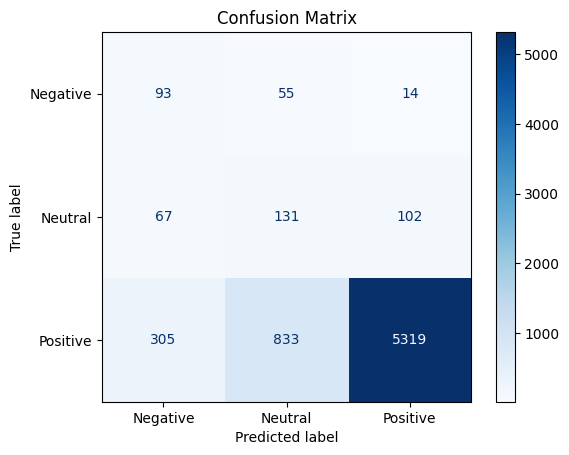

In [ ]:
# Initialize Logistic Regression model
lr_model = LogisticRegression(multi_class='multinomial', solver='newton-cg',C=0.4,
                                         class_weight="balanced", fit_intercept=False,
                                         max_iter=250, penalty='l2',tol=0.0001)

# Train the model on the vectorized training data
lr_model.fit(vectorized_training_texts, mapped_training_labels)

# Predict on the test data
y_val_pred = lr_model.predict(vectorized_validation_texts)

# Calculate evaluation metrics on validation data
accuracy_val = accuracy_score(mapped_validation_labels, y_val_pred)
precision_val = precision_score(mapped_validation_labels, y_val_pred, average='weighted')
recall_val = recall_score(mapped_validation_labels, y_val_pred, average='weighted')
f1_val = f1_score(mapped_validation_labels, y_val_pred, average='weighted')

print("Logistic Regression Metrics on Validation Data:")
print(f"  Accuracy: {accuracy_val}")
print(f"  Precision: {precision_val}")
print(f"  Recall: {recall_val}")
print(f"  F1 Score: {f1_val}")


# Calculate and display the confusion matrix for test data
cm = confusion_matrix(mapped_validation_labels, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Neutral', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

**Results with c=0.6**

The C parameter controls the regularization strength, where a lower C value indicates stronger regularization

Logistic Regression Metrics on Validation Data:
  Accuracy: 0.8101083032490974
  Precision: 0.9217055704575848
  Recall: 0.8101083032490974
  F1 Score: 0.8554772566044306

  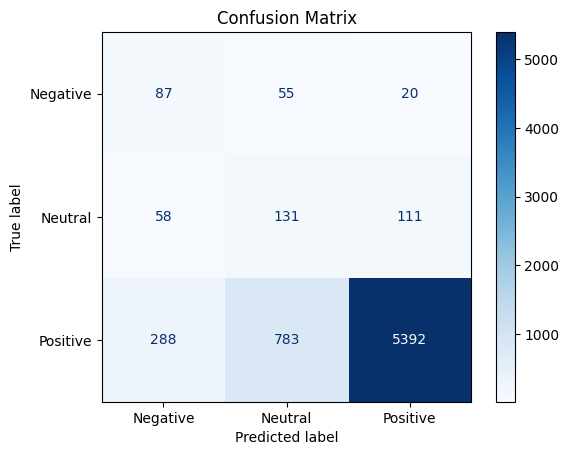

### 3.2 Results
Model achieved an accuracy of X% on the test dataset.
Precision, recall, and F1-score for each class are as follows:
Class 1: Precision=X%, Recall=X%, F1-score=X%
Class 2: Precision=X%, Recall=X%, F1-score=X%
...
Confusion matrix showing table and graphical representations

Logistic Regression Metrics on Test Data:
  Accuracy: 0.7995664739884393
  Precision: 0.9228187348879037
  Recall: 0.7995664739884393
  F1 Score: 0.8488688192164429


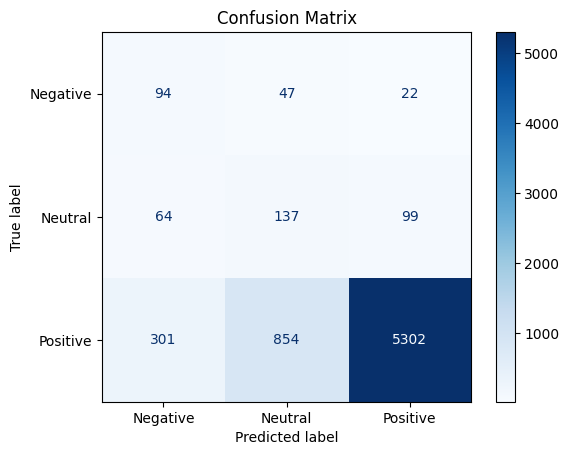

In [ ]:
# Predict on the test data
y_test_pred = lr_model.predict(vectorized_test_texts)

# Calculate evaluation metrics on test data
accuracy_test = accuracy_score(mapped_test_labels, y_test_pred)
precision_test = precision_score(mapped_test_labels, y_test_pred, average='weighted')
recall_test = recall_score(mapped_test_labels, y_test_pred, average='weighted')
f1_test = f1_score(mapped_test_labels, y_test_pred, average='weighted')

print("Logistic Regression Metrics on Test Data:")
print(f"  Accuracy: {accuracy_test}")
print(f"  Precision: {precision_test}")
print(f"  Recall: {recall_test}")
print(f"  F1 Score: {f1_test}")

# Calculate and display the confusion matrix for test data
cm = confusion_matrix(mapped_test_labels, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Neutral', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### Testing

In [ ]:
new_reviews = ['this product is incredible', 'this product is terrible']

for review in new_reviews:
    processed_review = preprocess_text(review)
    vectorized_review = tfidf_vectorizer.transform([processed_review])
    predicted_sentiment = lr_model.predict(vectorized_review)

    # Print the predicted sentiment
    print(f"Review: '{review}'")
    print(f"Processed Review: '{processed_review}'")
    print(f"Predicted Sentiment: {predicted_sentiment}")
    print()


Review: 'this product is incredible'
Processed Review: 'product incredible'
Predicted Sentiment: [2]

Review: 'this product is terrible'
Processed Review: 'product terrible'
Predicted Sentiment: [0]



# Sequence-to-Sequence modeling with LSTM

Build a Biderectional LSTM model to predict the review class i.e., negative, positive, or neutral.


## Pre-processing

```
# reloading data since it's following a different logic
```



#### Loading

In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, GRU, Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
original_1 = pd.read_csv('/content/1429_1.csv',low_memory=False)
original_2 = pd.read_csv('/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv', low_memory=False)

In [ ]:
print("file 1 info:")
original_1.info()
print("file 2 info:")
original_2.info()

file 1 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  review

In [ ]:
# Find duplicates based on review.text
duplicate_texts = original_1['reviews.text'].unique()
original_2 = original_2[~original_2['reviews.text'].isin(duplicate_texts)]

# Check the result
original_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14027 entries, 0 to 28249
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   14027 non-null  object 
 1   dateAdded            14027 non-null  object 
 2   dateUpdated          14027 non-null  object 
 3   name                 14027 non-null  object 
 4   asins                14027 non-null  object 
 5   brand                14027 non-null  object 
 6   categories           14027 non-null  object 
 7   primaryCategories    14027 non-null  object 
 8   imageURLs            14027 non-null  object 
 9   keys                 14027 non-null  object 
 10  manufacturer         14027 non-null  object 
 11  manufacturerNumber   14027 non-null  object 
 12  reviews.date         14027 non-null  object 
 13  reviews.dateSeen     14027 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  2040 non-null   obje

In [ ]:
# reducing size of 5 star reviews by half
original_2 = original_2.drop(original_2[original_2['reviews.rating'] == 5].sample(frac=0.5, random_state=1).index)
original_2['reviews.rating'].value_counts()

reviews.rating
5    5161
4    1875
1     781
3     623
2     425
Name: count, dtype: int64

In [ ]:
original_1[['id', 'name', 'categories', 'reviews.date', 'reviews.rating', 'reviews.text', 'reviews.title']].copy()

id  \
0      AVqkIhwDv8e3D1O-lebb   
1      AVqkIhwDv8e3D1O-lebb   
2      AVqkIhwDv8e3D1O-lebb   
3      AVqkIhwDv8e3D1O-lebb   
4      AVqkIhwDv8e3D1O-lebb   
...                     ...   
34655  AVpfiBlyLJeJML43-4Tp   
34656  AVpfiBlyLJeJML43-4Tp   
34657  AVpfiBlyLJeJML43-4Tp   
34658  AVpfiBlyLJeJML43-4Tp   
34659  AVpfiBlyLJeJML43-4Tp   

                                                    name  \
0      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
...                                                  ...   
34655                                                NaN   
34656                                                NaN   
34657                                                NaN   
34658                                                NaN   
34659                                                NaN   

                                              categories  \
0      Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1      Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2      Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3      Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4      Electronics,iPad & Tablets,All Tablets,Fire Ta...   
...                                                  ...   
34655  Computers/Tablets & Networking,Tablet & eBook ...   
34656  Computers/Tablets & Networking,Tablet & eBook ...   
34657  Computers/Tablets & Networking,Tablet & eBook ...   
34658  Computers/Tablets & Networking,Tablet & eBook ...   
34659  Computers/Tablets & Networking,Tablet & eBook ...   

                   reviews.date  reviews.rating  \
0      2017-01-13T00:00:00.000Z             5.0   
1      2017-01-13T00:00:00.000Z             5.0   
2      2017-01-13T00:00:00.000Z             5.0   
3      2017-01-13T00:00:00.000Z             4.0   
4      2017-01-12T00:00:00.000Z             5.0   
...                         ...             ...   
34655      2012-09-18T00:00:00Z             3.0   
34656      2012-11-21T00:00:00Z             1.0   
34657      2012-10-19T00:00:00Z             1.0   
34658      2012-10-31T00:00:00Z             1.0   
34659      2012-12-23T00:00:00Z             1.0   

                                            reviews.text  \
0      This product so far has not disappointed. My c...   
1      great for beginner or experienced person. Boug...   
2      Inexpensive tablet for him to use and learn on...   
3      I've had my Fire HD 8 two weeks now and I love...   
4      I bought this for my grand daughter when she c...   
...                                                  ...   
34655  This is not appreciably faster than any other ...   
34656  Amazon should include this charger with the Ki...   
34657  Love my Kindle Fire but I am really disappoint...   
34658  I was surprised to find it did not come with a...   
34659  to spite the fact that i have nothing but good...   

                                           reviews.title  
0                                                 Kindle  
1                                              very fast  
2                Beginner tablet for our 9 year old son.  
3                                                Good!!!  
4                              Fantastic Tablet for kids  
...                                                  ...  
34655  Not appreciably faster than any other 1.8A cha...  
34656                                 Should be included  
34657                              Disappointing Charger  
34658                                Not worth the money  
34659                              as with everyone else  

[34660 rows x 7 columns]

#
### Processing

#### File 1 Category Mapping

In [ ]:
file_1 = original_1[['id', 'name', 'categories', 'reviews.date', 'reviews.rating', 'reviews.text', 'reviews.title']].copy()
file_1 = original_1.dropna(subset=['reviews.rating', 'reviews.text', 'reviews.date'])   # dropping rows with no review text or rating
file_1['reviews.title'] = file_1['reviews.title'].fillna(" ")
file_1['name'] = file_1['name'].fillna("NA")    # replace missing product names with "NA" > used in mapping below

<ipython-input-218-c5676d665c6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_1['reviews.title'] = file_1['reviews.title'].fillna(" ")
<ipython-input-218-c5676d665c6f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_1['name'] = file_1['name'].fillna("NA")    # replace missing product names with "NA" > used in mapping below


In [ ]:
## Defining the mapping dicts

name_categories = {
    'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta': 'Tablets',
    'Kindle Oasis E-reader with Leather Charging Cover - Merlot, 6 High-Resolution Display (300 ppi), Wi-Fi - Includes Special Offers,,': 'E-readers',
    'Amazon Kindle Lighted Leather Cover,,,\r\nAmazon Kindle Lighted Leather Cover,,,': 'Accessories',
    'Amazon Kindle Lighted Leather Cover,,,\r\nKindle Keyboard,,,': 'Accessories',
    'Kindle Keyboard,,,\r\nKindle Keyboard,,,': 'Accessories',
    'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta': 'Tablets',
    'Fire HD 8 Tablet with Alexa, 8 HD Display, 32 GB, Tangerine - with Special Offers,': 'Tablets',
    'Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,\r\nAmazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,': 'Accessories',
    'All-New Kindle E-reader - Black, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers,,': 'E-readers',
    'Amazon Kindle Fire Hd (3rd Generation) 8gb,,,\r\nAmazon Kindle Fire Hd (3rd Generation) 8gb,,,': 'E-readers',
    'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta': 'Tablets',
    'Kindle Oasis E-reader with Leather Charging Cover - Black, 6 High-Resolution Display (300 ppi), Wi-Fi - Includes Special Offers,,': 'E-readers',
    'Amazon - Kindle Voyage - 4GB - Wi-Fi + 3G - Black,,,\r\nAmazon - Kindle Voyage - 4GB - Wi-Fi + 3G - Black,,,': 'E-readers',
    'Amazon - Kindle Voyage - 4GB - Wi-Fi + 3G - Black,,,\r\nFire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers",': 'E-readers',
    'Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers,': 'Tablets',
    'Amazon Standing Protective Case for Fire HD 6 (4th Generation) - Black,,,\r\nAmazon Standing Protective Case for Fire HD 6 (4th Generation) - Black,,,': 'Accessories',
    'Certified Refurbished Amazon Fire TV (Previous Generation - 1st),,,\r\nCertified Refurbished Amazon Fire TV (Previous Generation - 1st),,,': 'Streaming Devices & Smart Speakers',
    'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,': 'E-readers',
    'Amazon Kindle Touch Leather Case (4th Generation - 2011 Release), Olive Green,,,\r\nAmazon Kindle Touch Leather Case (4th Generation - 2011 Release), Olive Green,,,': 'Accessories',
    'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case': 'Tablets',
    'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,': 'E-readers',
    'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,': 'E-readers',
    'Certified Refurbished Amazon Fire TV Stick (Previous Generation - 1st),,,\r\nCertified Refurbished Amazon Fire TV Stick (Previous Generation - 1st),,,': 'Streaming Devices & Smart Speakers',
    'Certified Refurbished Amazon Fire TV Stick (Previous Generation - 1st),,,\r\nKindle Paperwhite,,,': 'Streaming Devices & Smart Speakers',
    'Kindle Paperwhite,,,\r\nKindle Paperwhite,,,': 'E-readers',
    'Amazon Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case - Blue': 'Tablets',
    'Kindle Paperwhite E-reader - White, 6 High-Resolution Display (300 ppi) with Built-in Light, Wi-Fi - Includes Special Offers,,': 'E-readers',
    'Amazon Echo and Fire TV Power Adapter,,,\r\nAmazon Echo and Fire TV Power Adapter,,,': 'Accessories',
    'Amazon Fire Hd 8 8in Tablet 16gb Black B018szt3bk 6th Gen (2016) Android,,,\r\nAmazon Fire Hd 8 8in Tablet 16gb Black B018szt3bk 6th Gen (2016) Android,,,': 'Tablets',
    'Certified Refurbished Amazon Fire TV with Alexa Voice Remote,,,\r\nCertified Refurbished Amazon Fire TV with Alexa Voice Remote,,,': 'Streaming Devices & Smart Speakers',
    'Amazon - Fire 16GB (5th Gen, 2015 Release) - Black,,,\r\nAmazon - Fire 16GB (5th Gen, 2015 Release) - Black,,,': 'Tablets',
    'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Black': 'Tablets',
    'Echo (White),,,\r\nEcho (White),,,': 'Streaming Devices & Smart Speakers',
    'Echo (White),,,\r\nFire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Tangerine"': 'Streaming Devices & Smart Speakers',
    'Echo (Black),,,\r\nEcho (Black),,,': 'Streaming Devices & Smart Speakers',
    'Echo (Black),,,\r\nAmazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,': 'Accessories',
    'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,\r\nAmazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,': 'Accessories',
    'Amazon Fire Hd 6 Standing Protective Case(4th Generation - 2014 Release), Cayenne Red,,,\r\nAmazon Fire Hd 6 Standing Protective Case(4th Generation - 2014 Release), Cayenne Red,,,': 'Accessories',
    'Amazon Fire Hd 6 Standing Protective Case(4th Generation - 2014 Release), Cayenne Red,,,\r\nAmazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,': 'Accessories',
    'Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,\r\nAmazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,': 'Tablets',
    'Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,\r\nAmazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,': 'Streaming Devices & Smart Speakers',
    'Coconut Water Red Tea 16.5 Oz (pack of 12),,,\r\nAmazon Fire Tv,,,': 'Streaming Devices & Smart Speakers',
    'Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,': 'Streaming Devices & Smart Speakers',
    'Amazon Fire Tv,,,\r\nKindle Dx Leather Cover, Black (fits 9.7 Display, Latest and 2nd Generation Kindle Dxs)",,': 'Accessories',
    'Kindle Dx Leather Cover, Black (fits 9.7 Display, Latest and 2nd Generation Kindle Dxs),,': 'Accessories',
    'Amazon Kindle Fire 5ft USB to Micro-USB Cable (works with most Micro-USB Tablets),,,\r\nAmazon Kindle Fire 5ft USB to Micro-USB Cable (works with most Micro-USB Tablets),,,': 'Accessories',
    'New Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable,,,\r\nNew Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable,,,': 'Accessories',
    'New Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable,,,\r\n': 'Accessories',
    'NA': 'Uncategorized'   # for products with no names
}



na_categories = {
    'Stereos,Remote Controls,Amazon Echo,Audio Docks & Mini Speakers,Amazon Echo Accessories,Kitchen & Dining Features,Speaker Systems,Electronics,TVs Entertainment,Clearance,Smart Hubs & Wireless Routers,Featured Brands,Wireless Speakers,Smart Home & Connected Living,Home Security,Kindle Store,Home Automation,Home, Garage & Office,Home,Voice-Enabled Smart Assistants,Virtual Assistant Speakers,Portable Audio & Headphones,Electronics Features,Amazon Device Accessories,iPod, Audio Player Accessories,Home & Furniture Clearance,Consumer Electronics,Smart Home,Surveillance,Home Improvement,Smart Home & Home Automation Devices,Smart Hubs,Home Safety & Security,Voice Assistants,Alarms & Sensors,Amazon Devices,Audio,Holiday Shop': 'Streaming Devices & Smart Speakers',
    'Fire Tablets,Tablets,Computers & Tablets,All Tablets,Frys': 'Tablets',
    'TVs Entertainment,Wireless Speakers,Virtual Assistant Speakers,Featured Brands,Electronics,Amazon Devices,Home,Home Improvement,Home Safety & Security,Home Security,Alarms & Sensors,Smart Home & Home Automation Devices,Smart Hubs & Wireless Routers,Smart Hubs,Consumer Electronics,Voice-Enabled Smart Assistants,Smart Home & Connected Living,Home, Garage & Office,Smart Home,Voice Assistants,Surveillance,Home Automation,Speakers,Electronics Features,Holiday Shop,TV, Video & Home Audio,Internet & Media Streamers,Amazon Echo,Hubs & Controllers': 'Streaming Devices & Smart Speakers',
    'Chargers & Adapters,Computers & Accessories,Tablet & E-Reader Accessories,Amazon Devices & Accessories,Fire Tablet Accessories,Electronics,Power Adapters & Cables,Cell Phones,Amazon Device Accessories,Cell Phone Accessories,Cell Phone Batteries & Power,Tablet Accessories,Featured Brands,Kindle Fire (2nd Generation) Accessories,Kindle Store,Home Improvement,Fire (5th Generation) Accessories,Electrical,Amazon Devices,Home,Tablets & E-Readers,Cables & Chargers': 'Accessories',
    'Cases,Kindle Store,Amazon Device Accessories,Accessories,Tablet Accessories': 'Accessories',
    'Electronics,eBook Readers & Accessories,Power Adapters,Computers/Tablets & Networking,Tablet & eBook Reader Accs,Chargers & Sync Cables,Power Adapters & Cables,Kindle Store,Amazon Device Accessories,Kindle Fire (2nd Generation) Accessories,Fire Tablet Accessories': 'Accessories',
    'Electronics,Tablets & E-Readers,Tablets,Back To College,College Electronics,College Ipads & Tablets,Featured Brands,Amazon Devices,Electronics Deals,Computers & Tablets,All Tablets,Electronics Features,eBook Readers': 'Tablets',
    'Featured Brands,Electronics,Amazon Devices,Home,Home Improvement,Home Safety & Security,Home Security,Alarms & Sensors,Smart Home & Home Automation Devices,Mobile,Mobile Speakers,Mobile Bluetooth Speakers,Smart Hubs & Wireless Routers,Smart Hubs,Home, Garage & Office,Smart Home,Voice Assistants,Smart Home & Connected Living,Amazon Tap,Portable Audio,MP3 Accessories,Speakers,Amazon Echo,Electronics Features,TVs & Electronics,Portable Audio & Electronics,MP3 Player Accessories,Home Theater & Audio,Kindle Store,Frys,Electronic Components,Home Automation,Electronics, Tech Toys, Movies, Music,Audio,Bluetooth Speakers': 'Streaming Devices & Smart Speakers',
    'Rice Dishes,Ready Meals,Beauty,Moisturizers,Lotions': 'Food & Beverages',
    'Back To College,College Electronics,College Tvs & Home Theater,Electronics,Tvs & Home Theater,Streaming Devices,Featured Brands,Amazon Devices,Holiday Shop,Ways To Shop,TV & Home Theater,Streaming Media Players,All Streaming Media Players,TVs Entertainment,Video Games,Kindle Store,Electronics Features,Kids & Family,Fire TV': 'Streaming Devices & Smart Speakers',
    'Electronics,Amazon Device Accessories,Kindle Store,Covers,Kindle E-Reader Accessories,Kindle DX (2nd Generation, Global Wireless) Accessories': 'Accessories',
    'Power Adapters & Cables,Electronics,USB Cables': 'Accessories',
    'Computers/Tablets & Networking,Tablet & eBook Reader Accs,Chargers & Sync Cables,Power Adapters & Cables,Kindle Store,Amazon Device Accessories,Fire Tablet Accessories,Kindle Fire (2nd Generation) Accessories': 'Accessories',
    'Amazon Devices & Accessories,Amazon Device Accessories,Power Adapters & Cables,Kindle Store,Kindle E-Reader Accessories,Kindle Paperwhite Accessories': 'Accessories'
}


In [ ]:
## Mapping
file_1['primaryCategories'] = file_1['name'].map(name_categories).fillna('Uncategorized')   # 1st mapping: setting primary category based on product name else; Uncategorized
uncategorized_mask = file_1['primaryCategories'] == 'Uncategorized'   # defining mask for second mapping
file_1.loc[uncategorized_mask, 'primaryCategories'] = file_1.loc[uncategorized_mask, 'categories'].map(na_categories) # 2nd mapping: setting primary category for the Uncategorized based on categories

<ipython-input-220-4acd269842ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_1['primaryCategories'] = file_1['name'].map(name_categories).fillna('Uncategorized')   # 1st mapping: setting primary category based on product name else; Uncategorized


In [ ]:
file_1 = file_1[file_1['primaryCategories'] != 'Food & Beverages'] # dropping this single review on a drink
file_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34597 entries, 0 to 34659
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34597 non-null  object 
 1   name                  34597 non-null  object 
 2   asins                 34595 non-null  object 
 3   brand                 34597 non-null  object 
 4   categories            34597 non-null  object 
 5   keys                  34597 non-null  object 
 6   manufacturer          34597 non-null  object 
 7   reviews.date          34597 non-null  object 
 8   reviews.dateAdded     24037 non-null  object 
 9   reviews.dateSeen      34597 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34118 non-null  float64
 14  reviews.rating        34597 non-null  float64
 15  reviews.sourceURLs    34

In [ ]:
file_1['primaryCategories'].value_counts()

primaryCategories
Tablets                               16510
Streaming Devices & Smart Speakers    12533
E-readers                              4928
Accessories                             626
Name: count, dtype: int64

#### Train/Test-val

In [ ]:
df = file_1[['id', 'name', 'categories', 'reviews.date', 'reviews.rating', 'reviews.text', 'reviews.title', 'primaryCategories']].copy()
df.columns

Index(['id', 'name', 'categories', 'reviews.date', 'reviews.rating',
       'reviews.text', 'reviews.title', 'primaryCategories'],
      dtype='object')

In [ ]:
df.dropna(subset=['reviews.text'],inplace=True)
print(len(df))

34597


In [ ]:
def clean_text(text):
    # Handle non-string types
    if not isinstance(text, str):
        return ""  # Or handle it differently based on your needs

    # Remove special characters and punctuation
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    # Remove unnecessary whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Convert text to lowercase
    text = text.lower()
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

def preprocess_text(text):
    cleaned_text = clean_text(text)
    lemmatized_text = lemmatize_text(cleaned_text)
    return lemmatized_text

# Creating sentiment labels based on rating
def get_sentiment(rating):
    if rating <= 2:
        return 0  # Negative
    elif rating == 3:
        return 1  # Neutral
    else:
        return 2  # Positive

df['sentiment'] = df['reviews.rating'].apply(get_sentiment)
df['processed_text'] = df['reviews.text'].apply(preprocess_text)
df.head()

id                                               name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

                                          categories  \
0  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

               reviews.date  reviews.rating  \
0  2017-01-13T00:00:00.000Z             5.0   
1  2017-01-13T00:00:00.000Z             5.0   
2  2017-01-13T00:00:00.000Z             5.0   
3  2017-01-13T00:00:00.000Z             4.0   
4  2017-01-12T00:00:00.000Z             5.0   

                                        reviews.text  \
0  This product so far has not disappointed. My c...   
1  great for beginner or experienced person. Boug...   
2  Inexpensive tablet for him to use and learn on...   
3  I've had my Fire HD 8 two weeks now and I love...   
4  I bought this for my grand daughter when she c...   

                             reviews.title primaryCategories  sentiment  \
0                                   Kindle           Tablets          2   
1                                very fast           Tablets          2   
2  Beginner tablet for our 9 year old son.           Tablets          2   
3                                  Good!!!           Tablets          2   
4                Fantastic Tablet for kids           Tablets          2   

                                      processed_text  
0  product far disappointed child love use like a...  
1  great beginner experienced person bought gift ...  
2  inexpensive tablet use learn step nabi thrille...  
3  ive fire hd 8 two week love tablet great value...  
4  bought grand daughter come visit set user ente...

In [ ]:
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

sentiment
2    32286
1     1499
0      812
Name: count, dtype: int64


In [ ]:
# Separate features and target
X = df['reviews.text']
y = df['sentiment']

# Tokenizing and padding the sequences
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(X)
vocab_size = len(tokenizer.word_index) + 1
sequences = tokenizer.texts_to_sequences(X)
padded_sequences = pad_sequences(sequences, maxlen=200, padding='post', truncating='post')

# Apply SMOTE (oversampling)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(padded_sequences, y)

# # Apply RandomUnderSampler (optional, if you want to combine both)
# rus = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

# Convert sentiment labels to categorical format
sentiment_labels = to_categorical(y_resampled)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, sentiment_labels, test_size=0.2, random_state=42)

# Calculate class weights
y_train_integers = np.argmax(y_train, axis=1)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_integers), y=y_train_integers)
class_weights_dict = dict(enumerate(class_weights))

#### Test

In [ ]:
test_df = original_2[['id', 'name', 'categories', 'reviews.date', 'reviews.rating', 'reviews.text', 'reviews.title', 'primaryCategories']].copy()
test_df.head()

id                                               name  \
0  AVpgNzjwLJeJML43Kpxn  AmazonBasics AAA Performance Alkaline Batterie...   
1  AVpgNzjwLJeJML43Kpxn  AmazonBasics AAA Performance Alkaline Batterie...   
2  AVpgNzjwLJeJML43Kpxn  AmazonBasics AAA Performance Alkaline Batterie...   
3  AVpgNzjwLJeJML43Kpxn  AmazonBasics AAA Performance Alkaline Batterie...   
4  AVpgNzjwLJeJML43Kpxn  AmazonBasics AAA Performance Alkaline Batterie...   

                                          categories  \
0  AA,AAA,Health,Electronics,Health & Household,C...   
1  AA,AAA,Health,Electronics,Health & Household,C...   
2  AA,AAA,Health,Electronics,Health & Household,C...   
3  AA,AAA,Health,Electronics,Health & Household,C...   
4  AA,AAA,Health,Electronics,Health & Household,C...   

               reviews.date  reviews.rating  \
0  2017-03-02T00:00:00.000Z               3   
1  2016-08-31T00:00:00.000Z               4   
2  2016-12-06T00:00:00.000Z               5   
3  2016-03-28T00:00:00.000Z               5   
4  2017-04-22T00:00:00.000Z               5   

                                        reviews.text  \
0  I order 3 of them and one of the item is bad q...   
1  Bulk is always the less expensive way to go fo...   
2  Well they are not Duracell but for the price i...   
3  Seem to work as well as name brand batteries a...   
4  These batteries are very long lasting the pric...   

                                       reviews.title primaryCategories  
0  ... 3 of them and one of the item is bad quali...   Health & Beauty  
1  ... always the less expensive way to go for pr...   Health & Beauty  
2  ... are not Duracell but for the price i am ha...   Health & Beauty  
3  ... as well as name brand batteries at a much ...   Health & Beauty  
4  ... batteries are very long lasting the price ...   Health & Beauty

In [ ]:
test_df.dropna(inplace=True)
print(len(test_df))

# Creating sentiment labels based on rating
def get_sentiment(rating):
    if rating <= 2:
        return 0  # Negative
    elif rating == 3:
        return 1  # Neutral
    else:
        return 2  # Positive

test_df['sentiment'] = test_df['reviews.rating'].apply(get_sentiment)
test_df['processed_text'] = test_df['reviews.text'].apply(preprocess_text)

8865


In [ ]:
# Tokenizing and padding the sequences
test_sequences = tokenizer.texts_to_sequences(test_df['reviews.text'])
X_test = pad_sequences(test_sequences, maxlen=200, padding='post', truncating='post')
y_test = to_categorical(test_df['sentiment'])



In [ ]:
sentiment_counts = test_df['sentiment'].value_counts()
print(sentiment_counts)

sentiment
2    7036
0    1206
1     623
Name: count, dtype: int64


## Model

### Training

In [ ]:
model_4 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=200),
    Bidirectional(LSTM(512, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(512)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])


model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])
model_4.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 200, 128)          1836160   
                                                                 
 bidirectional_30 (Bidirect  (None, 200, 1024)         2625536   
 ional)                                                          
                                                                 
 dropout_41 (Dropout)        (None, 200, 1024)         0         
                                                                 
 bidirectional_31 (Bidirect  (None, 1024)              6295552   
 ional)                                                          
                                                                 
 dropout_42 (Dropout)        (None, 1024)              0         
                                                                 
 dense_26 (Dense)            (None, 128)             

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, mode='min')
history = model_4.fit(X_train, y_train, epochs=23, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping], class_weight=class_weights_dict)

Epoch 1/23
1211/1211 [==============================] - 94s 73ms/step - loss: 0.7758 - accuracy: 0.5844 - precision: 0.6576 - recall: 0.4387 - val_loss: 0.6946 - val_accuracy: 0.6251 - val_precision: 0.6785 - val_recall: 0.5200
Epoch 2/23
1211/1211 [==============================] - 62s 51ms/step - loss: 0.9101 - accuracy: 0.5267 - precision: 0.6387 - recall: 0.2892 - val_loss: 0.8209 - val_accuracy: 0.5677 - val_precision: 0.7055 - val_recall: 0.3298
Epoch 3/23
1211/1211 [==============================] - 61s 50ms/step - loss: 0.7212 - accuracy: 0.6009 - precision: 0.6621 - recall: 0.4761 - val_loss: 0.6965 - val_accuracy: 0.5966 - val_precision: 0.6184 - val_recall: 0.5443
Epoch 4/23
1211/1211 [==============================] - 60s 50ms/step - loss: 0.6680 - accuracy: 0.6271 - precision: 0.6676 - recall: 0.5370 - val_loss: 0.6923 - val_accuracy: 0.6303 - val_precision: 0.6666 - val_recall: 0.5494
Epoch 5/23
1211/1211 [==============================] - 60s 49ms/step - loss: 0.6232 - a

In [ ]:
evaluation = model_4.evaluate(X_val, y_val)

# Print the results
print(f'Validation Loss: {evaluation[0]}')
print(f'Validation Accuracy: {evaluation[1]}')
print(f'Validation Precision: {evaluation[2]}')
print(f'Validation Recall: {evaluation[3]}')


606/606 [==============================] - 12s 19ms/step - loss: 0.5899 - accuracy: 0.7110 - precision: 0.7235 - recall: 0.6953
Validation Loss: 0.5899065136909485
Validation Accuracy: 0.7110262513160706
Validation Precision: 0.7235174179077148
Validation Recall: 0.6952818632125854


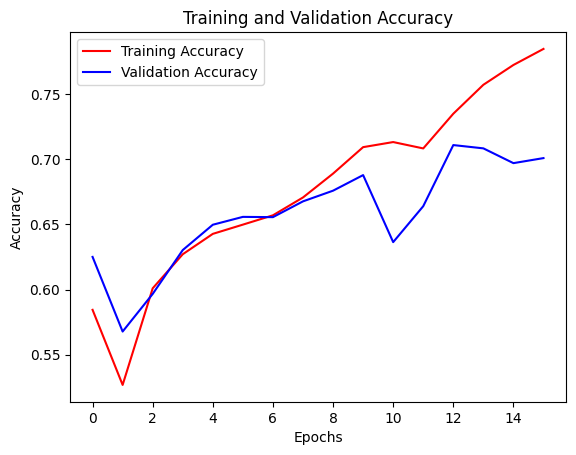

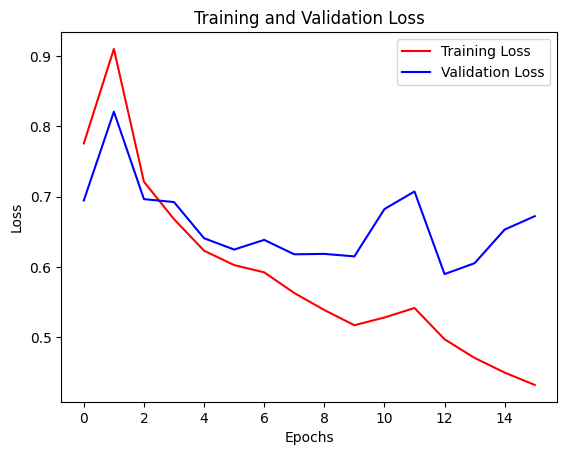

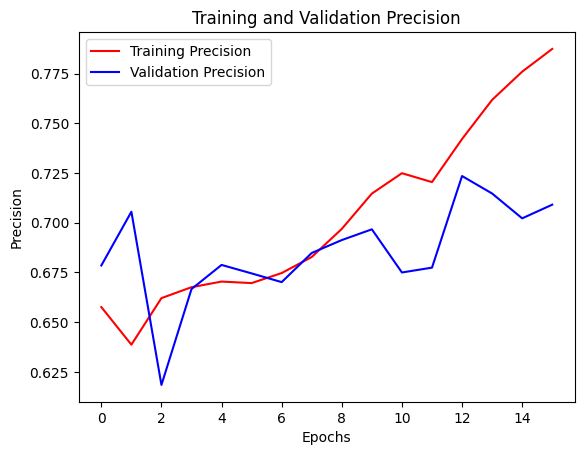

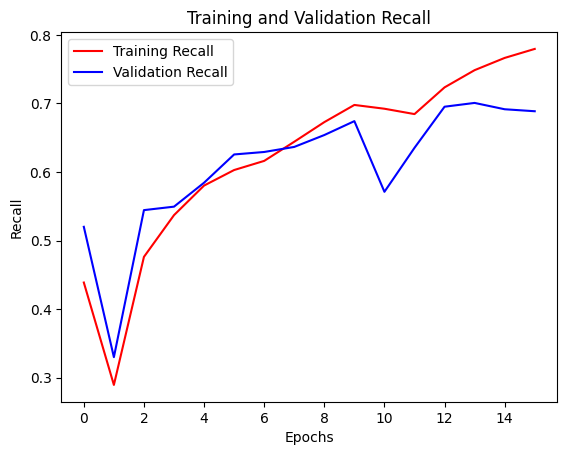

In [ ]:
# Retrieve history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
precision = history.history['precision']
val_precision = history.history['val_precision']
recall = history.history['recall']
val_recall = history.history['val_recall']

epochs = range(len(acc))

# Plot training and validation accuracy
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure()
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation precision
plt.figure()
plt.plot(epochs, precision, 'r', label='Training Precision')
plt.plot(epochs, val_precision, 'b', label='Validation Precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Plot training and validation recall
plt.figure()
plt.plot(epochs, recall, 'r', label='Training Recall')
plt.plot(epochs, val_recall, 'b', label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

### Prediction

In [ ]:
# Make predictions on the test data
y_pred_prob = model_4.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

278/278 [==============================] - 6s 17ms/step
Accuracy: 0.7130287648054145
Precision: 0.7612363952872192
Recall: 0.7130287648054145
F1-score: 0.7342564335147488


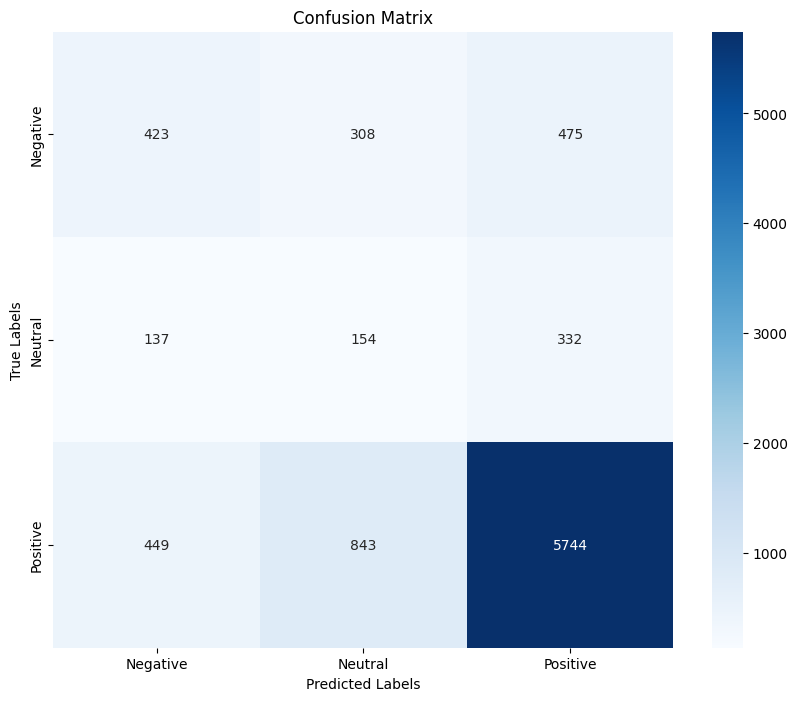

In [ ]:
# confusion matrix
class_names = ['Negative', 'Neutral', 'Positive']

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Identify wrong predictions
wrong_predictions = np.where(y_pred != y_true)[0]

# Extract the corresponding review texts, ratings, and sentiments
wrong_samples = test_df.iloc[wrong_predictions].copy()

# Add predicted sentiment to the wrong samples using .loc
wrong_samples.loc[:, 'predicted_sentiment'] = y_pred[wrong_predictions]

# Map numeric sentiments to string labels (optional, for better readability)
sentiment_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
wrong_samples.loc[:, 'sentiment'] = wrong_samples['sentiment'].map(sentiment_mapping)
wrong_samples.loc[:, 'predicted_sentiment'] = wrong_samples['predicted_sentiment'].map(sentiment_mapping)

# Display some of the wrong predictions
wrong_samples[['reviews.rating', 'reviews.text', 'sentiment', 'predicted_sentiment']].head(10)

reviews.rating                                       reviews.text  \
0                3  I order 3 of them and one of the item is bad q...   
2                5  Well they are not Duracell but for the price i...   
8                3  These do not hold the amount of high power jui...   
11               3  When I first started getting the Amazon basic ...   
14               5  we have many things that need aa battery they ...   
22               5  They last as long as Duracell batteries in my ...   
24               1  These do not last long at all very cheap batte...   
26               4  These Amazon batteries did the job although I ...   
29               3  these were under a light we thought they were ...   
38               5   These last as well as Energizer- half the price.   

   sentiment predicted_sentiment  
0    Neutral            Positive  
2   Positive             Neutral  
8    Neutral            Negative  
11   Neutral            Positive  
14  Positive             Neutral  
22  Positive            Negative  
24  Negative             Neutral  
26  Positive             Neutral  
29   Neutral            Positive  
38  Positive             Neutral

In [ ]:
# model_save_path = '/content/drive/My Drive/final_LSTM_model_final'
# model_4.save(model_save_path)

# Transformer approach (HuggingFace API)

## Flan T5

#### 1. Data Preprocessing
#### 1.1 Data Cleaning and Tokenization
Cleaned and tokenized the customer review data to remove special characters, punctuation, and unnecessary whitespace.
Applied tokenization using the tokenizer provided by the HuggingFace Transformers API to convert text data into input tokens suitable for model input.

In [29]:
print(f"Original Categories: {len(df['categories'].unique())}")
print(f"Primary Categories: {len(df['primaryCategories'].unique())}")

Original Categories: 36
Primary Categories: 4


In [30]:
concatenated_reviews = []
# Iterate over unique primary categories
for category in df['primaryCategories'].unique():
    # Filter DataFrame for the current category
    category_df = df[df['primaryCategories'] == category]

    # Iterate over unique ratings within the current category
    for rating in category_df['reviews.rating'].unique():
        # Filter DataFrame for the current category and rating
        group = category_df[category_df['reviews.rating'] == rating]

        # Concatenate reviews into a single string or list
        concatenated_reviews.append({
            'primaryCategories': category,
            'reviews.rating': rating,
            'concatenated_reviews': " ".join(group['reviews.text'].tolist())
        })

concatenated_reviews_df = pd.DataFrame(concatenated_reviews)

In [31]:
concatenated_reviews_df.head()

primaryCategories  reviews.rating  \
0           Tablets             5.0   
1           Tablets             4.0   
2           Tablets             2.0   
3           Tablets             1.0   
4           Tablets             3.0   

                                concatenated_reviews  
0  This product so far has not disappointed. My c...  
1  I've had my Fire HD 8 two weeks now and I love...  
2  Didn't have some of the features I was looking...  
3  i Bought this around black friday for $60 hopi...  
4  I was hoping to use Google launcher with this ...

In [32]:
# Join 'reviews.rating' and 'primaryCategories' into a single 'id' column
concatenated_reviews_df['id'] = concatenated_reviews_df['primaryCategories'] + ', ' + concatenated_reviews_df['reviews.rating'].astype(str)

# Create a new DataFrame with 'id' and 'concatenated_reviews' columns
processed_df = concatenated_reviews_df[['id', 'concatenated_reviews']].copy()  # Use .copy() to avoid chained assignment

# Apply preprocess_text function using .loc
processed_df.loc[:, 'concatenated_reviews'] = processed_df['concatenated_reviews'].apply(preprocess_text)

# Print the processed DataFrame
processed_df.head(20)

id  \
0                              Tablets, 5.0   
1                              Tablets, 4.0   
2                              Tablets, 2.0   
3                              Tablets, 1.0   
4                              Tablets, 3.0   
5                            E-readers, 5.0   
6                            E-readers, 4.0   
7                            E-readers, 1.0   
8                            E-readers, 3.0   
9                            E-readers, 2.0   
10                         Accessories, 4.0   
11                         Accessories, 3.0   
12                         Accessories, 5.0   
13                         Accessories, 1.0   
14                         Accessories, 2.0   
15  Streaming Devices & Smart Speakers, 5.0   
16  Streaming Devices & Smart Speakers, 4.0   
17  Streaming Devices & Smart Speakers, 3.0   
18  Streaming Devices & Smart Speakers, 2.0   
19  Streaming Devices & Smart Speakers, 1.0   

                                 concatenated_reviews  
0   product far disappointed child love use like a...  
1   ive fire hd 8 two week love tablet great value...  
2   didnt feature looking returned next day may go...  
3   bought around black friday 60 hoping would awe...  
4   hoping use google launcher tablet really locke...  
5   lightweight portable excellent battery life li...  
6   first ereader didnt know odd refresh took litt...  
7   upgrade mean three year old kindle outperforme...  
8   th size difference noticeable squarish rather ...  
9   easy carry purse pocket doesnt anything better...  
10  finally received kindle lighted leather cover ...  
11  owned kindle keyboard year purchased leather l...  
12  read every single review cover decided buy gla...  
13  dont option password ask buying apps authorize...  
14  q whats difference 1999 amazon 5w usb official...  
15  purchased nephew must say awesome buy kid pric...  
16  love fact parental control manage tablet usage...  
17  could download apps needed control tv bought p...  
18  full disclosure ive ipads past needed android ...  
19  stay away certified refurbished amazon fire tv...

### 1.2 Data Encoding and Padding
Encoded the tokenized input sequences into numerical IDs using the tokenizer's vocabulary.
Padded input sequences to a maximum length to ensure uniform input size across samples.



**Primary Categories builder**

*italicized text*## 2. Model Building
#### 2.1 Model Selection
Explored transformer-based models available in the HuggingFace Transformers API, including:
BERT (Bidirectional Encoder Representations from Transformers)
RoBERTa (Robustly Optimized BERT Approach)
DistilBERT (Lightweight version of BERT)
...
Selected a pre-trained transformer model suitable for text classification tasks, and justify your choice.

**USING VALIDATION SET FOR INFERENCE**


##### original

In [ ]:
# # Clear GPU memory
# gc.collect()
# torch.cuda.empty_cache()

# # Initialize the summarizer pipeline
# # tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")
# # summarizer = pipeline("summarization", model="google/flan-t5-base")

# tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")
# model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base")
# summarizer = pipeline("summarization", model=model, tokenizer=tokenizer)

# # Function to summarize concatenated reviews
# def summarize_concatenated_reviews(concatenated_reviews):
#     # Calculate the length of the concatenated reviews
#     review_length = len(concatenated_reviews.split())

#     # Set max_length based on review length, ensuring it's at least 10 for meaningful output
#     max_length = max(review_length, 10)

#     # Tokenize input and truncate if it exceeds maximum length
#     inputs = tokenizer("Summarize: " + concatenated_reviews, truncation=True, max_length=512, return_tensors="pt")

#     # Generate summary
#     summary = summarizer.model.generate(inputs.input_ids, max_length=max_length, min_length=10, num_beams=4, early_stopping=True)
#     return tokenizer.decode(summary[0], skip_special_tokens=True)

# # Assuming df contains columns 'id' and 'concatenated_reviews'
# processed_df['summary'] = processed_df['concatenated_reviews'].apply(summarize_concatenated_reviews)

In [ ]:
# # Display the resulting DataFrame with summaries
# processed_df[['id', 'summary']]

##### Improved chunking and batching
```



In [33]:
# Clear GPU memory
gc.collect()
torch.cuda.empty_cache()

# Initialize the summarizer pipeline
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")
model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base")
summarizer = pipeline("summarization", model=model, tokenizer=tokenizer, device=0)

# Function to summarize concatenated reviews using datasets
def summarize_with_prompt_batch(reviews, batch_size=8):
    # Create a Dataset from reviews
    ds = Dataset.from_dict({'text': reviews})

    # Tokenize and truncate the input text
    ds = ds.map(lambda x: tokenizer(x['text'], truncation=True, padding='max_length', max_length=512), batched=True, batch_size=batch_size)

    summaries = []
    for i in range(0, len(ds), batch_size):
        batch = ds.select(range(i, min(i + batch_size, len(ds))))
        inputs = {key: torch.tensor(batch[key]).to(model.device) for key in tokenizer.model_input_names}

        # Generate summaries
        summary_ids = model.generate(**inputs, max_length=150, min_length=50, num_beams=4, early_stopping=True)

        # Decode summaries
        summaries.extend(tokenizer.batch_decode(summary_ids, skip_special_tokens=True))

    return summaries


In [34]:
# Function to process concatenated reviews in manageable chunks
def process_in_chunks(concatenated_reviews, chunk_size=512):
    tokens = tokenizer.tokenize(concatenated_reviews)
    chunks = []
    for i in range(0, len(tokens), chunk_size):
        chunk_tokens = tokens[i:i+chunk_size]
        chunk_text = tokenizer.convert_tokens_to_string(chunk_tokens)
        chunks.append(chunk_text)
    return chunks



In [35]:
# Grouping and summarizing reviews
def group_and_summarize_reviews(df, batch_size=8):
    final_summaries = []

    # Group by primaryCategories and reviews.rating
    grouped = df.groupby(['primaryCategories', 'reviews.rating'])

    for (category, rating), group in grouped:
        concatenated_reviews = " ".join(group['concatenated_reviews'].tolist())

        # Process reviews in chunks
        chunks = process_in_chunks(concatenated_reviews)

        # Summarize each chunk in batches
        chunk_summaries = summarize_with_prompt_batch(chunks, batch_size=batch_size)

        # Combine summaries into a final summary
        final_summary = " ".join(chunk_summaries)

        final_summaries.append({
            'Category': category,
            'Rating': rating,
            'Summary': final_summary
        })

    return pd.DataFrame(final_summaries)



In [39]:
def create_meta_summaries(df, shot_prompt, batch_size=8, max_words=500):
    meta_summaries = []

    # Generate meta-summary for each category and rating
    for idx, row in df.iterrows():
        category = row['Category']
        rating = row['Rating']
        combined_summaries = row['Summary']

        # Add the prompt to the combined summaries
        combined_summaries_with_prompt = shot_prompt + " " + combined_summaries

        # Process combined summaries in chunks
        chunks = process_in_chunks(combined_summaries_with_prompt)

        # Summarize the combined summaries in batches
        meta_summary = " ".join(summarize_with_prompt_batch(chunks, batch_size=batch_size))

        # Ensure the meta-summary is not longer than 500 words
        words = meta_summary.split()
        if len(words) > max_words:
            meta_summary = " ".join(words[:max_words])

        meta_summaries.append({
            'Category': category,
            'Rating': rating,
            'Meta_Summary': meta_summary
        })

    return pd.DataFrame(meta_summaries)


In [37]:
# Process the DataFrame
processed_df = group_and_summarize_reviews(concatenated_reviews_df)

Token indices sequence length is longer than the specified maximum sequence length for this model (2882 > 512). Running this sequence through the model will result in indexing errors


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Map:   0%|          | 0/8 [00:00<?, ? examples/s]

Map:   0%|          | 0/21 [00:00<?, ? examples/s]

Map:   0%|          | 0/4 [00:00<?, ? examples/s]

Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Map:   0%|          | 0/14 [00:00<?, ? examples/s]

Map:   0%|          | 0/86 [00:00<?, ? examples/s]

Map:   0%|          | 0/296 [00:00<?, ? examples/s]

Map:   0%|          | 0/14 [00:00<?, ? examples/s]

Map:   0%|          | 0/15 [00:00<?, ? examples/s]

Map:   0%|          | 0/42 [00:00<?, ? examples/s]

Map:   0%|          | 0/223 [00:00<?, ? examples/s]

Map:   0%|          | 0/661 [00:00<?, ? examples/s]

Map:   0%|          | 0/26 [00:00<?, ? examples/s]

Map:   0%|          | 0/27 [00:00<?, ? examples/s]

Map:   0%|          | 0/84 [00:00<?, ? examples/s]

Map:   0%|          | 0/367 [00:00<?, ? examples/s]

Map:   0%|          | 0/660 [00:00<?, ? examples/s]

TypeError: summarize_with_prompt_batch() got an unexpected keyword argument 'prompt'

In [38]:
# Display the resulting DataFrame with summaries
processed_df[['Category', 'Rating', 'Summary']]

Category  Rating  \
0                          Accessories     1.0   
1                          Accessories     2.0   
2                          Accessories     3.0   
3                          Accessories     4.0   
4                          Accessories     5.0   
5                            E-readers     1.0   
6                            E-readers     2.0   
7                            E-readers     3.0   
8                            E-readers     4.0   
9                            E-readers     5.0   
10  Streaming Devices & Smart Speakers     1.0   
11  Streaming Devices & Smart Speakers     2.0   
12  Streaming Devices & Smart Speakers     3.0   
13  Streaming Devices & Smart Speakers     4.0   
14  Streaming Devices & Smart Speakers     5.0   
15                             Tablets     1.0   
16                             Tablets     2.0   
17                             Tablets     3.0   
18                             Tablets     4.0   
19                             Tablets     5.0   

                                              Summary  
0   You don't need this. Just plug your tablet int...  
1   5W USB Official OEM Charger and Power Adapter ...  
2   It's a joke that Amazon doesn't just ship a ch...  
3   Kindle. The light is activated by the Kindle i...  
4   My husband's previous tablet died a sudden dea...  
5   My Father In Law - this was the most frustrati...  
6   It is too heavy for its size! I purchased it t...  
7   Not a favorite purchase, had trouble w/shuttin...  
8   Kindle Oasis is a lightweight, long-lasting e-...  
9   Kindle Oasis is very small and portable & fits...  
10  BB store for warranty claim, they said to BB S...  
11  It's a good tablet, but it's not a perfect tab...  
12  I am not too happy with the Kindle. It's ok bu...  
13  I like my tablet very much,it does all the thi...  
14  I've ever used. It's a great tablet for a kid....  
15  I have tried resetting my phone and it still d...  
16  Fire HD8 we purchased died within 1 week of pu...  
17  The Fire HD8 (2016 model) did not have a lot o...  
18  I love this tablet. It's a good size and has a...  
19  kindle fire 8....this is what my 9 yr old gran...

In [45]:
#Define a one-shot prompt
shot_prompt = """
Example 1: purchased expanded memory 64gb sd card 30 cover 20 biggest issue unit slow compared ipad tends freeze every often 25x money consider it instead worse graphic wont keep wireless connectionoverall satisfied fancy slow amazon prime access great library tv show movie free go free book rental amazon app store great lot apps outdated still work latest version would expect amazon
Summary: The Fire tablet has received negative feedback due to poor battery life and frequent technical issues, and although the shows are nice they complain that the apps are outdated.

Example 2: upgrade mean three year old kindle outperformed oasisbattery life better week light lowest setting magnetic connector poorly designed grows weak two piece keep unsnaps constantly amazon customer
Summary: Customers are highly dissatisfied with the Kindle and Fire tablets, citing poor battery life, weak magnetic connectors, defective charging ports, and frequent malfunctions.

Example 3: product far disappointed child love use like adult past two week return due frozen screen reset work battery life poor charge child barely use enough return day buy still recommend
Summary: Many users are unhappy with the Fire tablets, highlighting issues like frozen screens, poor battery life, and frequent need for resets.

Summarize the following using less or equal to 500 words:
"""

meta_summaries_df = create_meta_summaries(processed_df, shot_prompt)

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Map:   0%|          | 0/2 [00:00<?, ? examples/s]

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Map:   0%|          | 0/2 [00:00<?, ? examples/s]

Map:   0%|          | 0/13 [00:00<?, ? examples/s]

Map:   0%|          | 0/43 [00:00<?, ? examples/s]

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Map:   0%|          | 0/6 [00:00<?, ? examples/s]

Map:   0%|          | 0/32 [00:00<?, ? examples/s]

Map:   0%|          | 0/95 [00:00<?, ? examples/s]

Map:   0%|          | 0/4 [00:00<?, ? examples/s]

Map:   0%|          | 0/4 [00:00<?, ? examples/s]

Map:   0%|          | 0/12 [00:00<?, ? examples/s]

Map:   0%|          | 0/48 [00:00<?, ? examples/s]

Map:   0%|          | 0/86 [00:00<?, ? examples/s]

In [46]:
meta_summaries_df[['Category', 'Rating', 'Meta_Summary']]

Category  Rating  \
0                          Accessories     1.0   
1                          Accessories     2.0   
2                          Accessories     3.0   
3                          Accessories     4.0   
4                          Accessories     5.0   
5                            E-readers     1.0   
6                            E-readers     2.0   
7                            E-readers     3.0   
8                            E-readers     4.0   
9                            E-readers     5.0   
10  Streaming Devices & Smart Speakers     1.0   
11  Streaming Devices & Smart Speakers     2.0   
12  Streaming Devices & Smart Speakers     3.0   
13  Streaming Devices & Smart Speakers     4.0   
14  Streaming Devices & Smart Speakers     5.0   
15                             Tablets     1.0   
16                             Tablets     2.0   
17                             Tablets     3.0   
18                             Tablets     4.0   
19                             Tablets     5.0   

                                         Meta_Summary  
0   I can honestly say that I don't recommend this...  
1   Kindle Fire HDX 8.9 Charger and Power Adapter ...  
2   Don't buy this charger. It's a joke that Amazo...  
3   Great product and I'm very happy with it. I've...  
4   I've been using it for a few years now and it'...  
5   Kindle Voyage - this was the stumbling block I...  
6   I don't like it. It's a good tablet but it tak...  
7   Kindle Voyager is the best. Though it doesn't ...  
8   Kindle Fire. Kindle Oasis. Fire Tablet. Amazon...  
9   Kindle Oasis is very small and portable & fits...  
10  I would not recommend this item. Get a Google ...  
11  Not impressed. Poor voice recognition. Not ver...  
12  Amazon does not have. I'll stick with Google h...  
13  I like my tablet very much,it does all the thi...  
14  I'm a big fan of the Kindle Fire 7 and it's a ...  
15  I don't think I'd buy this tablet again. It's ...  
16  Fire HD8 is a great tablet, it's not worth the...  
17  Fire HD8 (2016 model) did not have a lot of op...  
18  Love this tablet. It's a good size and has a n...  
19  Love it..actually read my first e-book on it, ...

In [47]:
meta_summaries_df

Category  Rating  \
0                          Accessories     1.0   
1                          Accessories     2.0   
2                          Accessories     3.0   
3                          Accessories     4.0   
4                          Accessories     5.0   
5                            E-readers     1.0   
6                            E-readers     2.0   
7                            E-readers     3.0   
8                            E-readers     4.0   
9                            E-readers     5.0   
10  Streaming Devices & Smart Speakers     1.0   
11  Streaming Devices & Smart Speakers     2.0   
12  Streaming Devices & Smart Speakers     3.0   
13  Streaming Devices & Smart Speakers     4.0   
14  Streaming Devices & Smart Speakers     5.0   
15                             Tablets     1.0   
16                             Tablets     2.0   
17                             Tablets     3.0   
18                             Tablets     4.0   
19                             Tablets     5.0   

                                         Meta_Summary  
0   I can honestly say that I don't recommend this...  
1   Kindle Fire HDX 8.9 Charger and Power Adapter ...  
2   Don't buy this charger. It's a joke that Amazo...  
3   Great product and I'm very happy with it. I've...  
4   I've been using it for a few years now and it'...  
5   Kindle Voyage - this was the stumbling block I...  
6   I don't like it. It's a good tablet but it tak...  
7   Kindle Voyager is the best. Though it doesn't ...  
8   Kindle Fire. Kindle Oasis. Fire Tablet. Amazon...  
9   Kindle Oasis is very small and portable & fits...  
10  I would not recommend this item. Get a Google ...  
11  Not impressed. Poor voice recognition. Not ver...  
12  Amazon does not have. I'll stick with Google h...  
13  I like my tablet very much,it does all the thi...  
14  I'm a big fan of the Kindle Fire 7 and it's a ...  
15  I don't think I'd buy this tablet again. It's ...  
16  Fire HD8 is a great tablet, it's not worth the...  
17  Fire HD8 (2016 model) did not have a lot of op...  
18  Love this tablet. It's a good size and has a n...  
19  Love it..actually read my first e-book on it, ...

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Bart Large CNN with the reviews compiled**

Output available in drive

In [ ]:
def text_summarizer(df):
    model_name = "facebook/bart-large-cnn"
    model = BartForConditionalGeneration.from_pretrained(model_name)
    tokenizer = BartTokenizer.from_pretrained(model_name)

    summaries_data = []
    for index, row in df.iterrows():
        review_id = row['id']  # Assuming 'id' is the column name for review ID
        review_text = row['concatenated_reviews']  # Assuming this contains the review text
        inputs = tokenizer.encode("summarize: " + review_text, return_tensors="pt", max_length=1024, truncation=True)
        summary_ids = model.generate(inputs, max_length=150, min_length=50, length_penalty=2.0, num_beams=4, early_stopping=True)
        summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

        summaries_data.append({'id': review_id, 'summary': summary})

    summaries_df = pd.DataFrame(summaries_data)
    return summaries_df

summaries_df = text_summarizer(processed_df)
print(summaries_df.head())  # Displaying the first few rows of the summaries DataFrame

summaries_df.to_csv('category_rating_summaries_bart-large-cnn.csv', index=False)
print(summaries_df)

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

             id                                            summary
0  Tablets, 5.0  summarize: product far disappointed child love...
1  Tablets, 4.0  summarize: ive fire hd 8 two week love tablet ...
2  Tablets, 2.0  summarize: didnt feature looking returned next...
3  Tablets, 1.0  summarize: bought around black friday 60 hopin...
4  Tablets, 3.0  summarize: hoping use google launcher tablet r...
                                         id  \
0                              Tablets, 5.0   
1                              Tablets, 4.0   
2                              Tablets, 2.0   
3                              Tablets, 1.0   
4                              Tablets, 3.0   
5                            E-readers, 5.0   
6                            E-readers, 4.0   
7                            E-readers, 1.0   
8                            E-readers, 3.0   
9                            E-readers, 2.0   
10                         Accessories, 4.0   
11                         Accesso

### 2.2 Model Fine-Tuning
Fine-tuned the selected pre-trained model on the customer review dataset using transfer learning.
Configured the fine-tuning process by specifying parameters such as batch size, learning rate, and number of training epochs.


check https://drive.google.com/file/d/1x8nf3cD9aLLx5-97tRMx-MPyb0LkxNOW/view?usp=sharing
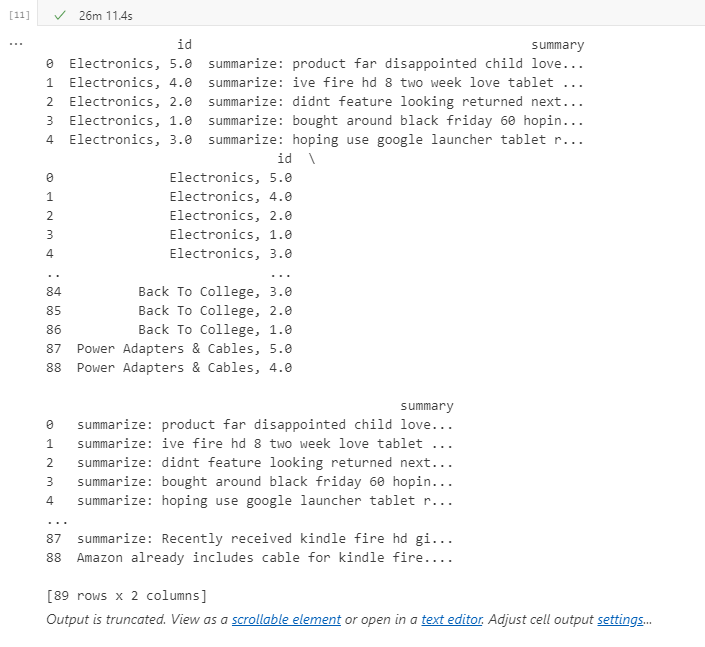

Option 2

In [ ]:


# Clear GPU memory
gc.collect()
torch.cuda.empty_cache()

# Initialize the GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")
summarizer = pipeline("text-generation", model=model, tokenizer=tokenizer)

# Function to generate summaries for a batch of reviews
def generate_summaries_batch(reviews):
    summaries = []
    max_input_length = 512  # Maximum length for GPT-2 input
    for review in reviews:
        prompt = f"Summarize the following text: {review}"
        # Truncate the review if it's too long
        truncated_prompt = tokenizer.decode(tokenizer.encode(prompt, max_length=max_input_length, truncation=True))
        inputs = tokenizer.encode(truncated_prompt, return_tensors="pt")
        outputs = summarizer(truncated_prompt, max_new_tokens=150, num_return_sequences=1)
        summary = outputs[0]['generated_text'].replace(prompt, '').strip()
        summaries.append(summary)
    return summaries

def summarize_reviews_in_df(df):
    # Ensure the DataFrame has the correct columns
    if 'id' not in df.columns or 'concatenated_reviews' not in df.columns:
        raise ValueError("DataFrame must contain 'id' and 'concatenated_reviews' columns")

    # Generate summaries for each row
    df['summary'] = generate_summaries_batch(df['concatenated_reviews'].tolist())
    return df

# Assuming processed_df is your DataFrame containing the 'id' and 'concatenated_reviews' columns
summarized_df = summarize_reviews_in_df(processed_df)

# Display the first few rows of the summaries DataFrame
print(summarized_df.head())

# Save the summarized DataFrame to CSV
summarized_df.to_csv('category_rating_summaries_gpt2.csv', index=False)

# Print or view the DataFrame
print(summarized_df)


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

             id                               concatenated_reviews  \
0  Tablets, 5.0  product far disappointed child love use like a...   
1  Tablets, 4.0  ive fire hd 8 two week love tablet great value...   
2  Tablets, 2.0  didnt feature looking returned next day may go...   
3  Tablets, 1.0  bought around black friday 60 hoping would awe...   
4  Tablets, 3.0  hoping use google launcher tablet really locke...   

                                             summary  
0  Summarize the following text: product far disa...  
1  Summarize the following text: ive fire hd 8 tw...  
2  Summarize the following text: didnt feature lo...  
3  Summarize the following text: bought around bl...  
4  Summarize the following text: hoping use googl...  
                                         id  \
0                              Tablets, 5.0   
1                              Tablets, 4.0   
2                              Tablets, 2.0   
3                              Tablets, 1.0   
4             

### Initial Trials

1. Filtering by category only
2. Filtering by category and rating

In [ ]:



# Calculate the frequency of each category
category_counts = df['primaryCategories'].value_counts()

# Select the top 5 most popular categories
top_categories = category_counts.head(10).index.tolist()

# Load pre-trained BART model and tokenizer
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')

# Define a function to concatenate and summarize reviews for each category and rating
def summarize_reviews_by_category_and_rating(df, category, rating):
    # Filter dataframe for the given category and rating
    category_rating_df = df[(df['primaryCategories'] == category) & (df['reviews.rating'] == rating)]

    # Concatenate all reviews for the category and rating
    concatenated_reviews = ' '.join(category_rating_df['reviews.text'].tolist())

    # Tokenize the concatenated reviews
    inputs = tokenizer([concatenated_reviews], max_length=1024, return_tensors='pt', truncation=True)

    # Generate summary using BART model
    summary_ids = model.generate(inputs['input_ids'], max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)

    # Decode and return the summary
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Initialize a dictionary to store summaries for each category and rating
category_rating_summaries = {}

# Iterate over each top category and each rating within the category
for category in top_categories:
    unique_ratings = df[df['primaryCategories'] == category]['reviews.rating'].unique()
    for rating in unique_ratings:
        category_rating_summaries[(category, rating)] = summarize_reviews_by_category_and_rating(df, category, rating)

# Print or use category_rating_summaries as needed
for (category, rating), summary in category_rating_summaries.items():
    print(f"Category: {category}, Rating: {rating}")
    print(f"Summary: {summary}")
    print()

# Convert dictionary to DataFrame
summary_df = pd.DataFrame(category_rating_summaries.items(), columns=['Category_Rating', 'Summary'])

# Split 'Category_Rating' column into 'Category' and 'Rating' columns
summary_df[['Category', 'Rating']] = pd.DataFrame(summary_df['Category_Rating'].tolist(), index=summary_df.index)
summary_df.drop(columns=['Category_Rating'], inplace=True)

# Save DataFrame to CSV
summary_df.to_csv('category_rating_summaries_Bart_Large_CNN.csv', index=False)

# Print or view the DataFrame
summary_df.head()

Category: Tablets, Rating: 5.0
Summary: This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease. great for beginner or experienced person. Bought as a gift and she loves it Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...

Category: Tablets, Rating: 4.0
Summary: I purchased this when my last tablet died. It meets all basic needs and the price was great. Perfect for downloading and reading books!! Perfect size and has a nice, bright screen. Works great. Love the portability of books.

Category: Tablets, Rating: 2.0
Summary: Didn't have some of the features I was looking for. Returned it the next day. May be good for others Not a good product short battery life i can only use for 20 minutes If you shop on Amazon all the time, this will help make it easier still. Lots of ads pop up, and you can't use apps from non-Amazon 

Summary Category  Rating
0  This product so far has not disappointed. My c...  Tablets     5.0
1  I purchased this when my last tablet died. It ...  Tablets     4.0
2  Didn't have some of the features I was looking...  Tablets     2.0
3  i bought this around black friday for $60 hopi...  Tablets     1.0
4  The Amazon Fire HD8 (2016 model) is a great ta...  Tablets     3.0

In [ ]:



# Calculate the frequency of each category
category_counts = df['primaryCategories'].value_counts()

# Select the top 5 most popular categories
top_categories = category_counts.head(5).index.tolist()

# Filter the dataframe for the top categories
df = df[df['primaryCategories'].isin(top_categories)]

# Group by categories and reviews.rating, aggregating the reviews.text into lists
grouped = df.groupby(['primaryCategories', 'reviews.rating'])['reviews.text'].agg(list)

# Load the FLAN-T5 summarization pipeline
tokenizer = AutoTokenizer.from_pretrained('google/flan-t5-small')
model = AutoModelForSeq2SeqLM.from_pretrained('google/flan-t5-small')
summarizer = pipeline('summarization', model=model, tokenizer=tokenizer)

# Define a function to summarize reviews
def summarize_reviews(reviews, batch_size=300):
    summaries = []

    for i in range(0, len(reviews), batch_size):
        batch = reviews[i:i + batch_size]
        concatenated_reviews = ' '.join(batch)

        # Summarize using the summarizer pipeline
        summary = summarizer(concatenated_reviews, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)

        # Extract and store the summary text
        summaries.append(summary[0]['summary_text'])

    # Combine all batch summaries into a single summary
    final_summary = ' '.join(summaries)
    return final_summary

# Initialize a dictionary to store summaries
summaries = {}

# Iterate over the grouped data
for (category, rating), reviews in grouped.items():
    summary = summarize_reviews(reviews)
    summaries[(category, rating)] = summary

# Convert dictionary to DataFrame
summary_df = pd.DataFrame(summaries.items(), columns=['Category_Rating', 'Summary'])

# Split 'Category_Rating' column into 'Category' and 'Rating' columns
summary_df[['Category', 'Rating']] = pd.DataFrame(summary_df['Category_Rating'].tolist(), index=summary_df.index)
summary_df.drop(columns=['Category_Rating'], inplace=True)

# Save DataFrame to CSV
summary_df.to_csv('category_rating_summaries_flan_t5_small.csv', index=False)

# Print or view the DataFrame
print(summary_df)


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (2885 > 512). Running this sequence through the model will result in indexing errors


KeyboardInterrupt: 

### 3. Model Evaluation


#### ROUGE SCORE


#### BLEU SCORE